In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

In [34]:
import pandas as pd
import numpy as np

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
data = pd.read_csv("placementdata.csv")
data

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [38]:
x = data.drop("PlacementStatus", axis = 1)
y = data["PlacementStatus"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state= 0)

In [40]:
x_train


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
7389,7390,8.2,0,3,1,90,4.8,Yes,No,61,75
9275,9276,8.4,2,1,2,90,4.5,Yes,Yes,81,83
2995,2996,8.1,1,1,1,77,4.6,Yes,Yes,73,87
5316,5317,8.6,2,1,2,69,3.8,Yes,Yes,74,81
356,357,8.9,2,3,2,89,4.6,Yes,Yes,71,83
...,...,...,...,...,...,...,...,...,...,...,...
9225,9226,7.7,1,2,2,83,3.9,Yes,Yes,81,75
4859,4860,8.0,2,3,2,90,4.8,Yes,Yes,78,85
3264,3265,8.1,1,3,2,78,4.8,Yes,Yes,78,84
9845,9846,8.0,2,3,2,90,4.8,Yes,Yes,81,88


In [41]:
x_train = x_train.drop("StudentID", axis = 1)

In [42]:
x_train.isna().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
dtype: int64

In [43]:
x_train["ExtracurricularActivities"] = (x_train["ExtracurricularActivities"] == "Yes").astype('int8')
x_train["PlacementTraining"] = (x_train["PlacementTraining"] == "Yes").astype('int8')


array([[<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'AptitudeTestScore'}>],
       [<Axes: title={'center': 'SoftSkillsRating'}>,
        <Axes: title={'center': 'SSC_Marks'}>],
       [<Axes: title={'center': 'HSC_Marks'}>, <Axes: >]], dtype=object)

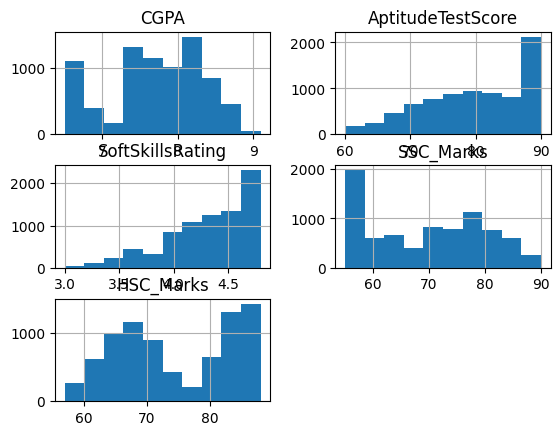

In [44]:
x_train[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]].hist()

In [45]:
x_train[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]] = np.log(x_train[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]])

array([[<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'AptitudeTestScore'}>],
       [<Axes: title={'center': 'SoftSkillsRating'}>,
        <Axes: title={'center': 'SSC_Marks'}>],
       [<Axes: title={'center': 'HSC_Marks'}>, <Axes: >]], dtype=object)

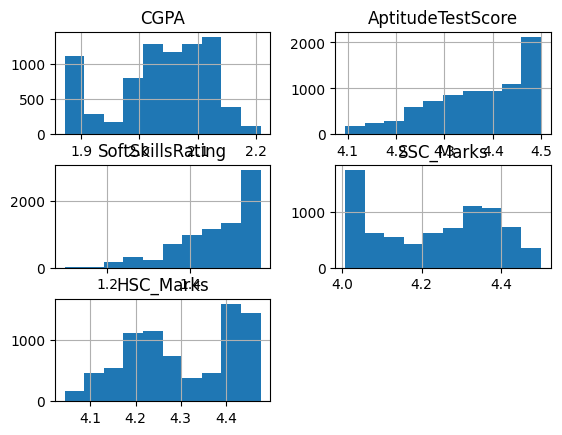

In [46]:
x_train[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]].hist()

In [47]:
std_scl = StandardScaler()
mm_scl = MinMaxScaler()
x_train_sc = x_train[["CGPA", "HSC_Marks"]]
x_train_sc = pd.DataFrame(std_scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[["CGPA", "HSC_Marks"]] = x_train_sc
x_train_sc = x_train[["AptitudeTestScore", "SoftSkillsRating", "SSC_Marks"]]
x_train_sc = pd.DataFrame(mm_scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[["AptitudeTestScore", "SoftSkillsRating", "SSC_Marks"]] = x_train_sc

In [48]:
y_train = (y_train == "Placed").astype("int8")

In [49]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [50]:
y_test = (y_test == "Placed").astype('int8')

In [51]:
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [52]:
x_test = x_test.drop("StudentID", axis = 1)
x_test["ExtracurricularActivities"] = (x_test["ExtracurricularActivities"] == "Yes").astype('int8')
x_test["PlacementTraining"] = (x_test["PlacementTraining"] == "Yes").astype('int8')
x_test[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]] = np.log(x_test[["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]])
x_test_sc = x_test[["CGPA", "HSC_Marks"]]
x_test_sc = pd.DataFrame(std_scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["CGPA", "HSC_Marks"]] = x_test_sc
x_test_sc = x_test[["AptitudeTestScore", "SoftSkillsRating", "SSC_Marks"]]
x_test_sc = pd.DataFrame(mm_scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["AptitudeTestScore", "SoftSkillsRating", "SSC_Marks"]] = x_test_sc

In [53]:
y_train_cat.shape

(8000, 2)

In [54]:
x_train

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
7389,0.783352,0,3,1,1.000000,1.000000,1,0,0.210245,0.111858
9275,1.065978,2,1,2,1.000000,0.862685,1,1,0.786060,0.950276
2995,0.639443,1,1,1,0.615246,0.909448,1,1,0.574903,1.339633
5316,1.341954,2,1,2,0.344695,0.502951,1,1,0.602530,0.748503
356,1.744111,2,3,2,0.972443,0.909448,1,1,0.518495,0.950276
...,...,...,...,...,...,...,...,...,...,...
9225,0.045471,1,2,2,0.800306,0.558218,1,1,0.786060,0.111858
4859,0.493746,2,3,2,1.000000,1.000000,1,1,0.709426,1.147245
3264,0.639443,1,3,2,0.647070,1.000000,1,1,0.709426,1.049347
9845,0.493746,2,3,2,1.000000,1.000000,1,1,0.786060,1.434174


In [77]:
model = tf.keras.Sequential([
    Input(shape = (10,)),
    Dense(10, activation = 'sigmoid'),
    Dense(10, activation = 'relu'),
    Dense(2, activation = 'softmax')
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242 (968.00 B)

 Trainable params: 242 (968.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [79]:
model.fit(x_train, y_train_cat, epochs = 200, batch_size = 100, validation_data = (x_test, y_test_cat))

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6391 - loss: 0.6341 - val_accuracy: 0.7675 - val_loss: 0.5690
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 0.5565 - val_accuracy: 0.7795 - val_loss: 0.4993
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4879 - val_accuracy: 0.7880 - val_loss: 0.4705
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4792 - val_accuracy: 0.7890 - val_loss: 0.4600
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4594 - val_accuracy: 0.7865 - val_loss: 0.4562
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 0.4666 - val_accuracy: 0.7855 - val_loss: 0.4540
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4638 - val_accuracy: 0.7855 - val_loss: 0.4536
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4473 - val_accuracy: 0.7890 - v

In [ ]:
x_test
